#### SUPPOBOX and Amazon 1M WhiteList

In [1]:
import pandas as pd
import numpy as np

In [ ]:
amazonDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/Alexa-Top-1M.csv',names=['index','Domain'])
amazonDataFrame.drop(['index'],axis=1,inplace=True) #drop index
amazonDataFrame.head()

,Domain
0,google.com
1,microsoft.com
2,www.google.com
3,data.microsoft.com
4,windowsupdate.com


In [ ]:
suppoboxDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/suppobox.csv')
suppoboxDataFrame.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
suppoboxDataFrame.head()

,Domain
0,rememberbuilt.net
1,wouldcarry.net
2,remembercarry.net
3,journeymeasure.net
4,husbandmeasure.net


In [ ]:
suppoboxDataFrame['lable'] = 1
amazonDataFrame['lable'] = 0

In [ ]:
amazonDataFrame = amazonDataFrame.iloc[:100000]

In [ ]:
dataset = pd.concat([amazonDataFrame,suppoboxDataFrame],ignore_index=True)
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.shape

(198304, 2)

In [ ]:
train_data = dataset.iloc[:160000]
test_data = dataset.iloc[160000:]

In [ ]:
X_train = train_data['Domain'].astype('str').tolist()
X_test = test_data['Domain'].astype('str').tolist()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 100   
tokenizer = Tokenizer(num_words=max_words,char_level=True,filters='',lower=True)

In [ ]:
%%time
tokenizer.fit_on_texts(X_train) 
x_train = tokenizer.texts_to_sequences(X_train)
x_test = tokenizer.texts_to_sequences(X_test)

CPU times: user 2.29 s, sys: 31.5 ms, total: 2.32 s
Wall time: 2.33 s


In [ ]:
tokenizer.index_word

{1: 'e',
 2: '.',
 3: 'n',
 4: 't',
 5: 'o',
 6: 'a',
 7: 'c',
 8: 'i',
 9: 'r',
 10: 's',
 11: 'm',
 12: 'l',
 13: 'd',
 14: 'p',
 15: 'h',
 16: 'g',
 17: 'u',
 18: '-',
 19: 'b',
 20: 'w',
 21: 'f',
 22: 'v',
 23: 'k',
 24: 'y',
 25: 'x',
 26: '1',
 27: '2',
 28: 'z',
 29: 'j',
 30: '3',
 31: 'q',
 32: '0',
 33: '5',
 34: '4',
 35: '6',
 36: '7',
 37: '8',
 38: '9'}

In [ ]:
y_train = train_data['lable'].values
y_test = test_data['lable'].values  

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len=255
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
not0train_idx = x_train.sum(1) > 0
not0test_idx = x_test.sum(1) > 0

In [ ]:
x_train = x_train[not0train_idx]
y_train = y_train[not0train_idx]

x_test = x_test[not0test_idx]
y_test = y_test[not0test_idx]

In [30]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPool1D, Input, GlobalMaxPool1D, Dropout
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, SimpleRNN, GRU, concatenate

from tensorflow.keras.models import Sequential, Model

In [31]:
keras.backend.clear_session()

max_epoch = 10
batch_size = 512
MAX_INDEX = len(tokenizer.index_word) + 1 # 0 Include
MAX_STRING_LENGTH = 255
EMBEDDING_DIMENSION = 128
NUM_CONV_FILTERS = 60

mit_model = Sequential()
mit_model.add(Embedding( MAX_INDEX, EMBEDDING_DIMENSION, input_length=MAX_STRING_LENGTH ))
mit_model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu', strides=1))
mit_model.add(MaxPool1D(pool_size=2, padding='same'))
mit_model.add(LSTM(64, return_sequences=False))
mit_model.add(Dense(1, activation='sigmoid'))

mit_model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(), metrics = ['acc',f1_m,precision_m, recall_m])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1)

mit_model.fit(x_train, y_train, epochs=10, batch_size=batch_size, 
          validation_split=0.2, verbose =1,
          callbacks=[es])

Epoch 1/10
250/250 [==============================] - 18s 65ms/step - loss: 0.1912 - acc: 0.9319 - f1_m: 0.9447 - precision_m: 0.9115 - recall_m: 0.9929 - val_loss: 0.0182 - val_acc: 0.9961 - val_f1_m: 0.9961 - val_precision_m: 0.9925 - val_recall_m: 0.9997
Epoch 2/10
250/250 [==============================] - 16s 62ms/step - loss: 0.0703 - acc: 0.9905 - f1_m: 0.9848 - precision_m: 0.9807 - recall_m: 0.9890 - val_loss: 0.0158 - val_acc: 0.9966 - val_f1_m: 0.9966 - val_precision_m: 0.9933 - val_recall_m: 0.9999
Epoch 3/10
250/250 [==============================] - 15s 62ms/step - loss: 0.0161 - acc: 0.9965 - f1_m: 0.9965 - precision_m: 0.9935 - recall_m: 0.9995 - val_loss: 0.0136 - val_acc: 0.9972 - val_f1_m: 0.9972 - val_precision_m: 0.9944 - val_recall_m: 1.0000
Epoch 4/10
250/250 [==============================] - 16s 62ms/step - loss: 0.0143 - acc: 0.9971 - f1_m: 0.9971 - precision_m: 0.9946 - recall_m: 0.9997 - val_loss: 0.0135 - val_acc: 0.9971 - val_f1_m: 0.9971 - val_precision_m

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = mit_model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)
print("MIT Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)
mit_model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)

## SUPPOBOX는 정확히 찾지만, 소수의 Whitelist 도 Suppobox로 간주함.

MIT Score
Loss :  0.012612727470695972
Precision :  0.9980385303497314
Recall :  0.9965159893035889
Accuracy :  0.9972587823867798
F1 Score :  0.997272253036499


[0.012612727470695972,
 0.9972587823867798,
 0.997272253036499,
 0.9980385303497314,
 0.9965159893035889]

In [32]:
keras.backend.clear_session()

max_epoch = 10
batch_size = 512
MAX_INDEX = len(tokenizer.index_word) + 1 # 0 
MAX_STRING_LENGTH = 255
EMBEDDING_DIMENSION = 128
NUM_CONV_FILTERS = 60

m_Input = Input((MAX_STRING_LENGTH,), dtype='int32', name='input')
#         EMBEDDING        #       
m_Embedding = Embedding(output_dim=EMBEDDING_DIMENSION,input_dim=MAX_INDEX,input_length=MAX_STRING_LENGTH,name='embeddingCNN')(m_Input)
conv2 = Conv1D(NUM_CONV_FILTERS, 2, name="conv2")(m_Embedding)
conv3 = Conv1D(NUM_CONV_FILTERS, 2, name="conv3")(m_Embedding)
conv4 = Conv1D(NUM_CONV_FILTERS, 2, name="conv4")(m_Embedding)
conv5 = Conv1D(NUM_CONV_FILTERS, 2, name="conv5")(m_Embedding)
conv6 = Conv1D(NUM_CONV_FILTERS, 2, name="conv6")(m_Embedding)

#         GLOBAL MAX POOL         #
pool2 = GlobalMaxPool1D(name="pool2")(conv2)
pool3 = GlobalMaxPool1D(name="pool3")(conv3)
pool4 = GlobalMaxPool1D(name="pool4")(conv4)
pool5 = GlobalMaxPool1D(name="pool5")(conv5)
pool6 = GlobalMaxPool1D(name="pool6")(conv6)
concatcnn = concatenate([pool2,pool3,pool4,pool5,pool6],axis=1, name='concatcnn')
dropoutcnnmid = Dropout(0.5, name="dropoutcnnmid")(concatcnn)
densecnn = Dense(NUM_CONV_FILTERS, activation="relu",name="densecnn")(dropoutcnnmid)
dropoutcnn = Dropout(0.5, name="dropoutcnn")(densecnn )

#         LSTM         #
embeddingLSTM = Embedding(output_dim=MAX_INDEX, input_dim=256,input_length=MAX_STRING_LENGTH, name='embeddingLSTM')(m_Input)
lstm = LSTM(256, name="lstm")(embeddingLSTM)
dropoutlstm = Dropout(0.5, name="dropoutlstm")(lstm)

#    Combine - ANN     #
l_concat = concatenate([dropoutcnn,dropoutlstm],axis=-1, name='concat')
dropoutsemifinal = Dropout(0.5, name="dropoutsemifinal")(l_concat)
extradense = Dense(100, activation='relu',name="extradense")(dropoutsemifinal)
dropoutfinal = Dropout(0.5, name="dropoutfinal")(extradense)
output = Dense(1, activation='sigmoid', name="output")(dropoutfinal)
bilbo_model = Model(m_Input, output)

In [33]:
bilbo_model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = ['acc',f1_m,precision_m, recall_m])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1)

bilbo_model.fit(x_train, y_train, epochs=10, batch_size=batch_size, 
          validation_split=0.2, verbose =1,
          callbacks=[es])

Epoch 1/10
250/250 [==============================] - 48s 183ms/step - loss: 0.4475 - acc: 0.8950 - f1_m: 0.8873 - precision_m: 0.8744 - recall_m: 0.9047 - val_loss: 0.0261 - val_acc: 0.9936 - val_f1_m: 0.9935 - val_precision_m: 0.9871 - val_recall_m: 1.0000
Epoch 2/10
250/250 [==============================] - 45s 181ms/step - loss: 0.0294 - acc: 0.9933 - f1_m: 0.9932 - precision_m: 0.9874 - recall_m: 0.9991 - val_loss: 0.0204 - val_acc: 0.9946 - val_f1_m: 0.9945 - val_precision_m: 0.9896 - val_recall_m: 0.9996
Epoch 3/10
250/250 [==============================] - 45s 181ms/step - loss: 0.0255 - acc: 0.9937 - f1_m: 0.9937 - precision_m: 0.9884 - recall_m: 0.9990 - val_loss: 0.0176 - val_acc: 0.9957 - val_f1_m: 0.9957 - val_precision_m: 0.9916 - val_recall_m: 0.9997
Epoch 4/10
250/250 [==============================] - 45s 181ms/step - loss: 0.0228 - acc: 0.9948 - f1_m: 0.9948 - precision_m: 0.9902 - recall_m: 0.9994 - val_loss: 0.0184 - val_acc: 0.9956 - val_f1_m: 0.9956 - val_precisi

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = bilbo_model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)
print("Bilbo Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)
#Bilbo 또한 Suppobox는 잘 찾지만, Loss가 있음, 실제 Whitelist 를 오류로 본 예시를 보아야 할 것 같음

Bilbo Score
Loss :  0.017150256782770157
Precision :  0.9926894903182983
Recall :  1.0
Accuracy :  0.9963189363479614
F1 Score :  0.9963241815567017


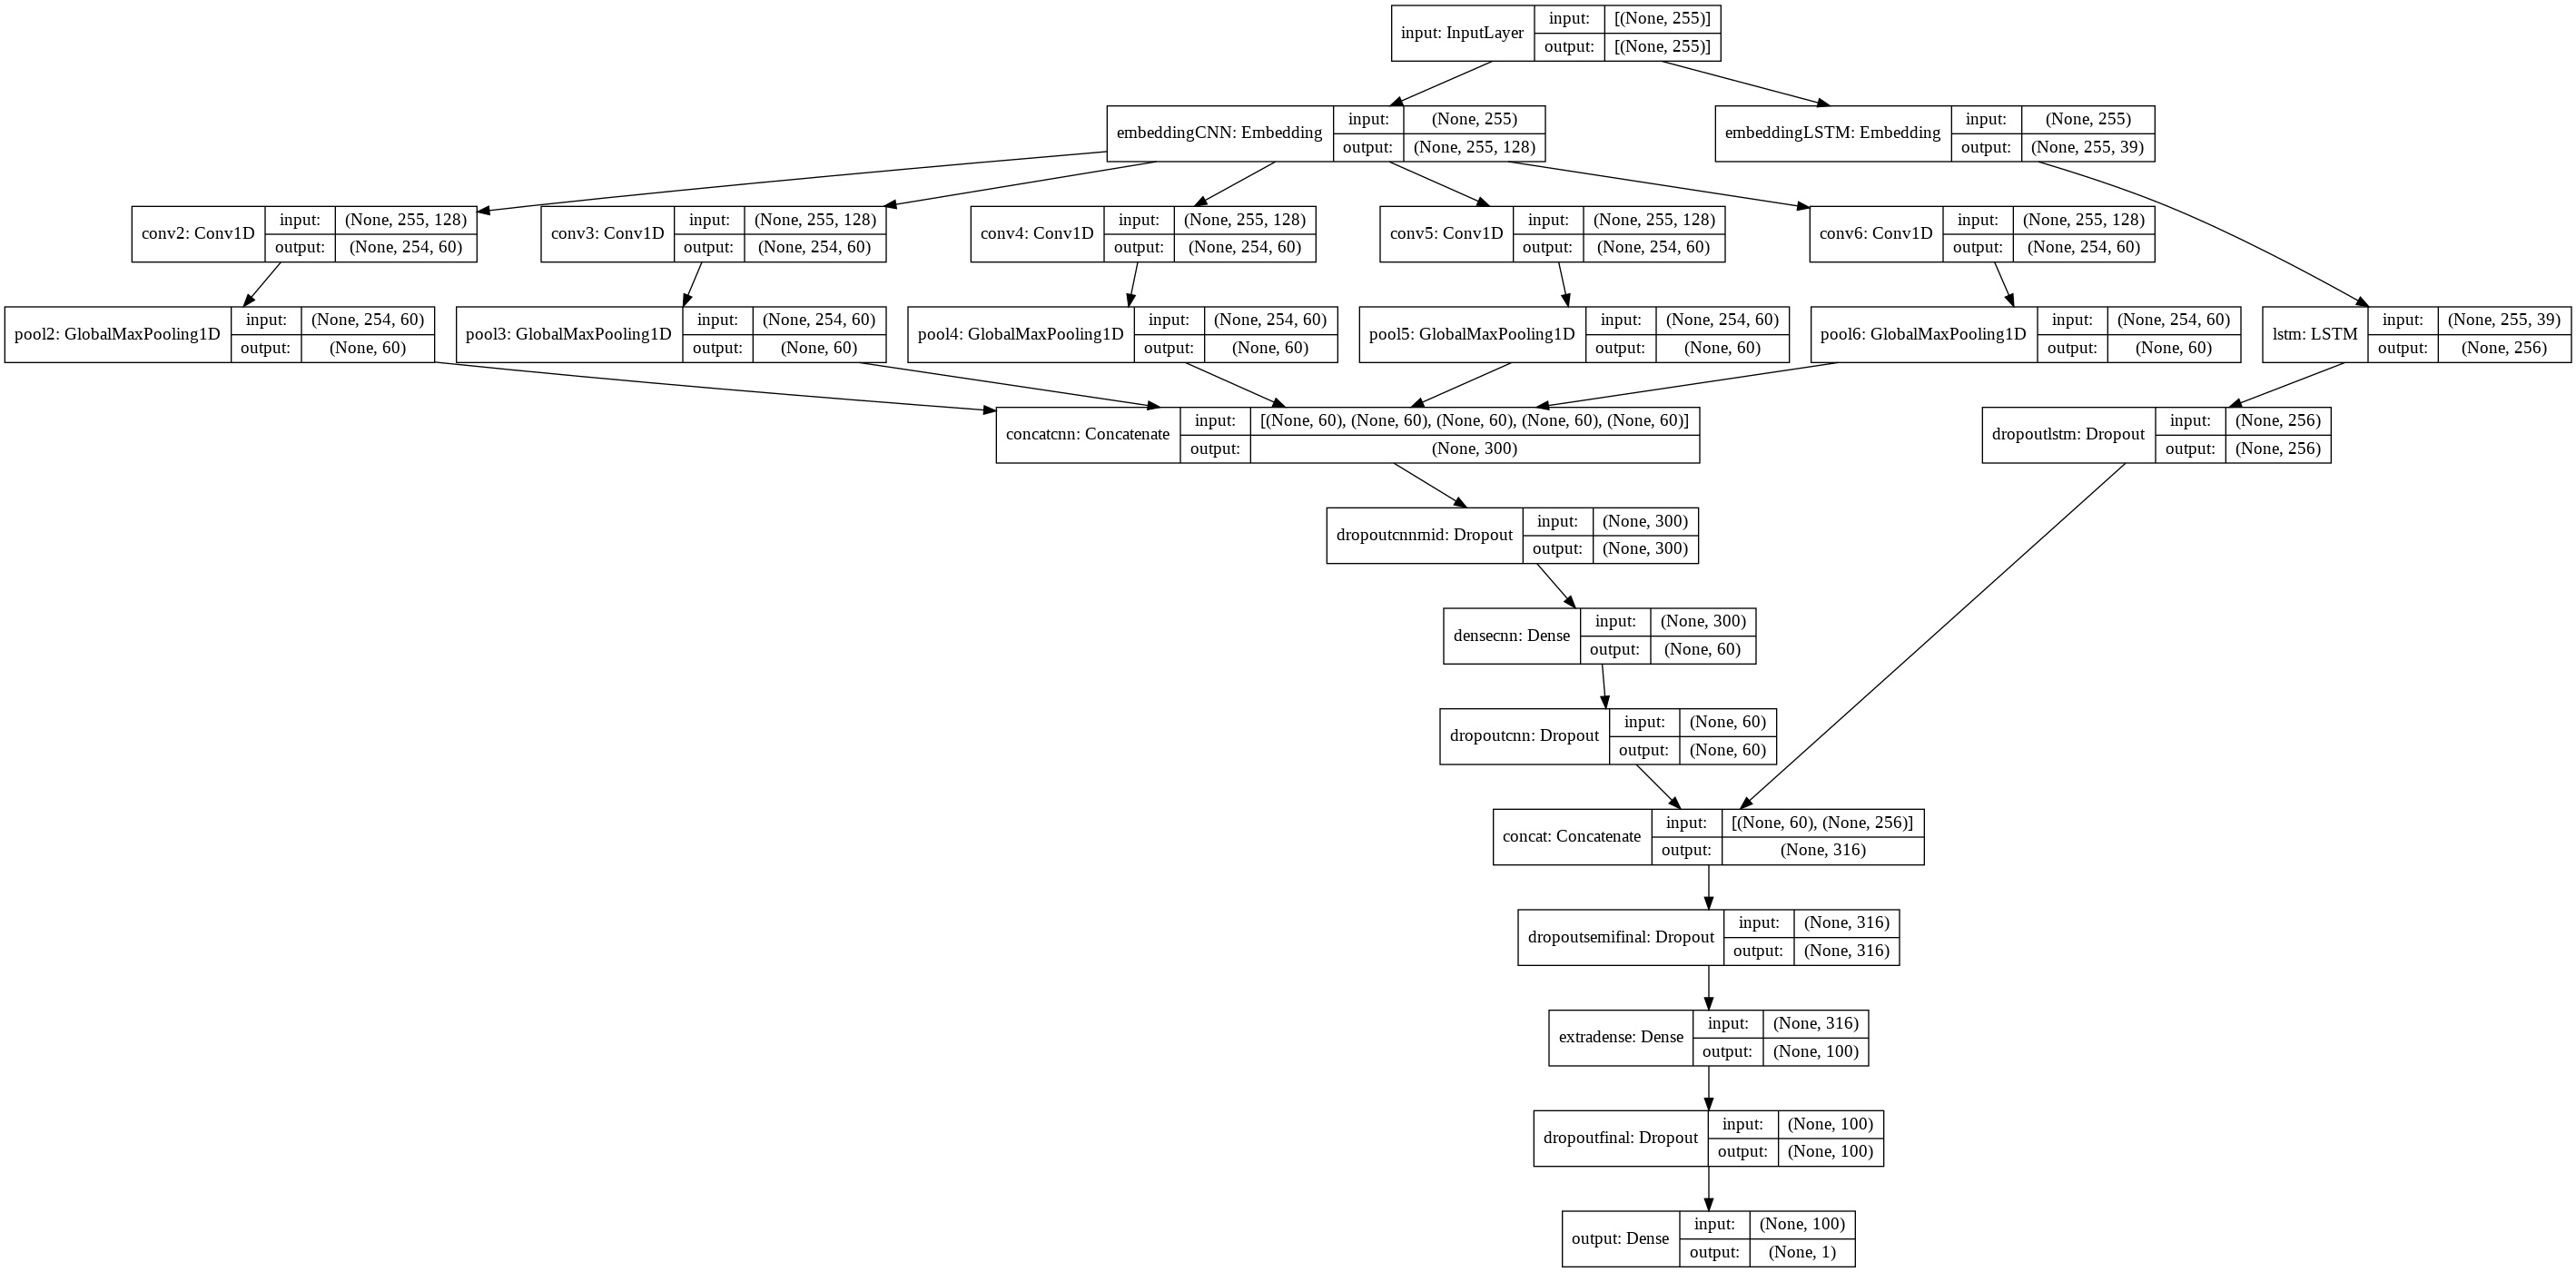

In [ ]:
keras.utils.plot_model(bilbo_model, show_shapes=True)

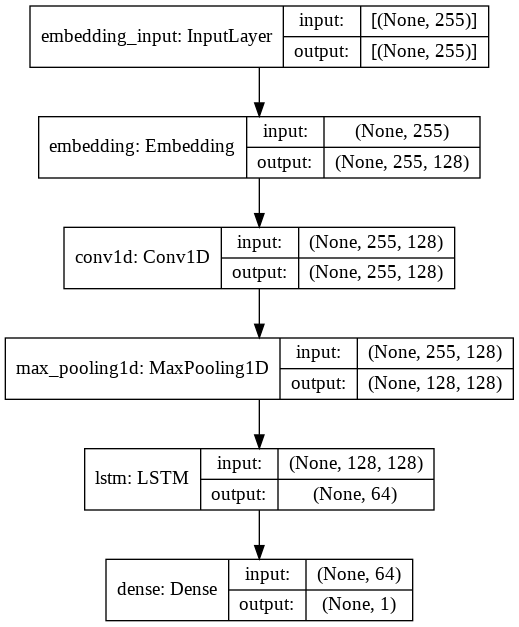

In [ ]:
keras.utils.plot_model(mit_model, show_shapes=True)

In [18]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### SUPPOBOX , Matu , Gozi

In [12]:
suppoboxDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/suppobox.csv')
suppoboxDataFrame.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
suppoboxDataFrame['lable'] = 1
suppoboxDataFrame.head()

,Domain,lable
0,rememberbuilt.net,1
1,wouldcarry.net,1
2,remembercarry.net,1
3,journeymeasure.net,1
4,husbandmeasure.net,1


In [13]:
matsnuDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/matsnu.csv',names=['Domain'])
# matsnuDataFrame.drop(['NaN','Date'],axis=1,inplace=True)
matsnuDataFrame[['Domain','Date1','Date2']] = matsnuDataFrame['Domain'].str.split("\t",expand=True)
matsnuDataFrame.drop(['Date1','Date2'],axis=1,inplace=True)
matsnuDataFrame['lable'] = 1
matsnuDataFrame.head()

,Domain,lable
0,shoe-option-diet.com,1
1,instruction-comment.com,1
2,plateprogram.com,1
3,panic-interest.com,1
4,implementadapt.com,1


In [14]:
goziDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/gozi-domains.csv',names=['Domain'])
# matsnuDataFrame.drop(['NaN','Date'],axis=1,inplace=True)
# goziDataFrame[['Domain','Date1','Date2']] = matsnuDataFrame['Domain'].str.split("\t",expand=True)
# goziDataFrame.drop(['Date1','Date2'],axis=1,inplace=True)
goziDataFrame['lable'] = 1
goziDataFrame.head()

,Domain,lable
0,posquoadlutpapeprnonndiu.com,1
1,salperfacitmaietiamquod.com,1
2,popodiosissimusillishac.com,1
3,sequiepisnulla.com,1
4,canonicepredicatorum.com,1


In [15]:
print(suppoboxDataFrame.shape)
print(matsnuDataFrame.shape)
print(goziDataFrame.shape)

(98304, 2)
(909, 2)
(175344, 2)


In [16]:
amazonDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/Alexa-Top-1M.csv',names=['index','Domain'])
amazonDataFrame.drop(['index'],axis=1,inplace=True) #drop index
amazonDataFrame['lable'] = 0
amazonDataFrame.head()
amazonDataFrame = amazonDataFrame.iloc[:300000] ### New Data
amazonDataFrame.shape

(300000, 2)

In [17]:
dataset = pd.concat([amazonDataFrame,suppoboxDataFrame,matsnuDataFrame,goziDataFrame],ignore_index=True)
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.shape

(574557, 2)

In [19]:
train_data = dataset.iloc[:400000]
test_data = dataset.iloc[400000:]

In [20]:
X_train = train_data['Domain'].astype('str').tolist()
X_test = test_data['Domain'].astype('str').tolist()

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 100   
tokenizer = Tokenizer(num_words=max_words,char_level=True,filters='',lower=True)

In [22]:
%%time
tokenizer.fit_on_texts(X_train) 
x_train = tokenizer.texts_to_sequences(X_train)
x_test = tokenizer.texts_to_sequences(X_test)

CPU times: user 6.36 s, sys: 85.5 ms, total: 6.45 s
Wall time: 6.46 s


In [23]:
y_train = train_data['lable'].values
y_test = test_data['lable'].values 

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
max_len=255
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [26]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [27]:
not0train_idx = x_train.sum(1) > 0
not0test_idx = x_test.sum(1) > 0

In [28]:
x_train = x_train[not0train_idx]
y_train = y_train[not0train_idx]

x_test = x_test[not0test_idx]
y_test = y_test[not0test_idx]

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1)

mit_model.fit(x_train, y_train, epochs=10, batch_size=batch_size, 
          validation_split=0.2, verbose =1,
          callbacks=[es])

Epoch 1/10
625/625 [==============================] - 74s 64ms/step - loss: 0.1524 - acc: 0.9299 - f1_m: 0.9074 - precision_m: 0.9366 - recall_m: 0.9131 - val_loss: 0.0406 - val_acc: 0.9877 - val_f1_m: 0.9872 - val_precision_m: 0.9804 - val_recall_m: 0.9941
Epoch 2/10
625/625 [==============================] - 39s 62ms/step - loss: 0.0521 - acc: 0.9859 - f1_m: 0.9844 - precision_m: 0.9762 - recall_m: 0.9928 - val_loss: 0.0370 - val_acc: 0.9884 - val_f1_m: 0.9880 - val_precision_m: 0.9830 - val_recall_m: 0.9930
Epoch 3/10
625/625 [==============================] - 39s 62ms/step - loss: 0.0354 - acc: 0.9891 - f1_m: 0.9886 - precision_m: 0.9817 - recall_m: 0.9957 - val_loss: 0.0320 - val_acc: 0.9900 - val_f1_m: 0.9896 - val_precision_m: 0.9844 - val_recall_m: 0.9950
Epoch 4/10
625/625 [==============================] - 39s 62ms/step - loss: 0.0325 - acc: 0.9900 - f1_m: 0.9896 - precision_m: 0.9836 - recall_m: 0.9957 - val_loss: 0.0291 - val_acc: 0.9912 - val_f1_m: 0.9908 - val_precision_m

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1)

bilbo_model.fit(x_train, y_train, epochs=10, batch_size=batch_size, 
          validation_split=0.2, verbose =1,
          callbacks=[es])

Epoch 1/10
625/625 [==============================] - 116s 182ms/step - loss: 0.2472 - acc: 0.8803 - f1_m: 0.8548 - precision_m: 0.8771 - recall_m: 0.8599 - val_loss: 0.0410 - val_acc: 0.9869 - val_f1_m: 0.9864 - val_precision_m: 0.9754 - val_recall_m: 0.9978
Epoch 2/10
625/625 [==============================] - 113s 181ms/step - loss: 0.0471 - acc: 0.9857 - f1_m: 0.9851 - precision_m: 0.9756 - recall_m: 0.9949 - val_loss: 0.0389 - val_acc: 0.9877 - val_f1_m: 0.9872 - val_precision_m: 0.9778 - val_recall_m: 0.9969
Epoch 3/10
625/625 [==============================] - 113s 181ms/step - loss: 0.0705 - acc: 0.9857 - f1_m: 0.9846 - precision_m: 0.9756 - recall_m: 0.9943 - val_loss: 0.0403 - val_acc: 0.9865 - val_f1_m: 0.9860 - val_precision_m: 0.9740 - val_recall_m: 0.9983
Epoch 4/10
625/625 [==============================] - 113s 181ms/step - loss: 0.0460 - acc: 0.9858 - f1_m: 0.9853 - precision_m: 0.9759 - recall_m: 0.9950 - val_loss: 0.0391 - val_acc: 0.9867 - val_f1_m: 0.9862 - val_pre

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = mit_model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)
print("MIT Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = bilbo_model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)
print("Bilbo Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)

### PIZD TEST

In [ ]:
pizdDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/pizd.csv')
pizdDataFrame.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
pizdDataFrame['lable'] = 1
pizdDataFrame.head()

,Domain,lable
0,chargeleader.net,1
1,cleanleader.net,1
2,chargeneedle.net,1
3,cleanneedle.net,1
4,chargelength.net,1


In [ ]:
###부장님 제공 pizd
pizdDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/pizd-domains.csv',names=['Domain'])
# pizdDataFrame.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
pizdDataFrame['lable'] = 1
pizdDataFrame.head()

,Domain,lable
0,aboveleader.net,1
1,alreadyleader.net,1
2,aboveneedle.net,1
3,alreadyneedle.net,1
4,abovelength.net,1


In [ ]:
pizdDataFrame.shape

(100810, 2)

In [ ]:
amazonDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/Alexa-Top-1M.csv',names=['index','Domain'])
amazonDataFrame.drop(['index'],axis=1,inplace=True) #drop index
amazonDataFrame['lable'] = 0
amazonDataFrame.head()
amazonDataFrame = amazonDataFrame.iloc[100000:110000] ### New Data
amazonDataFrame.shape

(10000, 2)

In [ ]:
new_dataset = pd.concat([amazonDataFrame,pizdDataFrame],ignore_index=True)
new_dataset = new_dataset.sample(frac=1).reset_index(drop=True)
new_dataset.shape

(110810, 2)

#### 3가지 이용 모델의 결과

In [ ]:
new_X_test = new_dataset['Domain'].astype('str').tolist() ###########################
new_x_test = tokenizer.texts_to_sequences(new_X_test)   #############################
new_y_test = new_dataset['lable'].values
new_x_test = pad_sequences(new_x_test, maxlen = max_len)
new_x_test = np.array(new_x_test)
not0newtest_idx = new_x_test.sum(1) > 0 
# new_data = new_dataset.loc[not0newtest_idx].reset_index(drop=True)
new_x_test = new_x_test[not0newtest_idx]   ################################

##### evaluate the model , pizd & whitelist 
loss, accuracy, f1_score, precision, recall = mit_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("MIT Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)


# evaluate the model (pizd and new whitelist)
loss, accuracy, f1_score, precision, recall = bilbo_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("Bilbo Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)

MIT Score
Loss :  0.10523629188537598
Precision :  0.9995536804199219
Recall :  0.9609343409538269
Accuracy :  0.9641909599304199
F1 Score :  0.979839563369751
Bilbo Score
Loss :  0.019811289384961128
Precision :  0.9991276264190674
Recall :  1.0
Accuracy :  0.9992148876190186
F1 Score :  0.9995629191398621


#### SUPPOBOX 모델 이용

In [ ]:
new_X_test = new_dataset['Domain'].astype('str').tolist() ###########################
new_x_test = tokenizer.texts_to_sequences(new_X_test)   #############################
new_y_test = new_dataset['lable'].values
new_x_test = pad_sequences(new_x_test, maxlen = max_len)
new_x_test = np.array(new_x_test)
not0newtest_idx = new_x_test.sum(1) > 0 
# new_data = new_dataset.loc[not0newtest_idx].reset_index(drop=True)
new_x_test = new_x_test[not0newtest_idx]   ################################

##### evaluate the model , pizd & whitelist 
loss, accuracy, f1_score, precision, recall = mit_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("MIT Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)


# evaluate the model (pizd and new whitelist)
loss, accuracy, f1_score, precision, recall = bilbo_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("Bilbo Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)

MIT Score
Loss :  0.3624887466430664
Precision :  0.9998577237129211
Recall :  0.909259021282196
Accuracy :  0.9173359870910645
F1 Score :  0.9523575305938721
Bilbo Score
Loss :  0.002255890751257539
Precision :  0.9996528625488281
Recall :  1.0
Accuracy :  0.9996841549873352
F1 Score :  0.9998263120651245


### NGIOWEB TEST

In [ ]:
ngiowebDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/ngioweb.csv',names=['Domain'])
ngiowebDataFrame['lable'] = 1
ngiowebDataFrame.head()
# ngiowebDataFrame.shape

,Domain,lable
0,enutofish-pronadimoful-multihitision.org,1
1,exaraxexese-macrobacaward-exafosuness.net,1
2,nonafudazage.name,1
3,demigelike.net,1
4,emuvufehood.net,1


In [ ]:
amazonDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/Alexa-Top-1M.csv',names=['index','Domain'])
amazonDataFrame.drop(['index'],axis=1,inplace=True) #drop index
amazonDataFrame['lable'] = 0
amazonDataFrame = amazonDataFrame.iloc[:1000] ### New Data
amazonDataFrame.head()
# amazonDataFrame.shape

,Domain,lable
0,google.com,0
1,microsoft.com,0
2,www.google.com,0
3,data.microsoft.com,0
4,windowsupdate.com,0


In [ ]:
new_dataset = pd.concat([amazonDataFrame,ngiowebDataFrame],ignore_index=True)
new_dataset = new_dataset.sample(frac=1).reset_index(drop=True)
# new_dataset.shape
new_dataset.head()

,Domain,lable
0,nel.measure.office.net,0
1,pull-flv-f11-ab.tiktokcdn.com,0
2,clientservices.googleapis.com,0
3,azureedge.net,0
4,inuviging-antizoluly.biz,1


#### 3가지 이용 모델을 사용 했을 경우

In [ ]:
new_X_test = new_dataset['Domain'].astype('str').tolist() ###########################
new_x_test = tokenizer.texts_to_sequences(new_X_test)   #############################
new_y_test = new_dataset['lable'].values
new_x_test = pad_sequences(new_x_test, maxlen = max_len)
new_x_test = np.array(new_x_test)
not0newtest_idx = new_x_test.sum(1) > 0 
new_data = new_dataset.loc[not0newtest_idx].reset_index(drop=True)
new_x_test = new_x_test[not0newtest_idx]   ################################

##### evaluate the model , ngioweb & whitelist 
loss, accuracy, f1_score, precision, recall = mit_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("MIT Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)

# evaluate the model (ngioweb and new whitelist)
loss, accuracy, f1_score, precision, recall = bilbo_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("Bilbo Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)

MIT Score
Loss :  0.8537651896476746
Precision :  0.9403584003448486
Recall :  0.31825077533721924
Accuracy :  0.8376923203468323
F1 Score :  0.4737885892391205
Bilbo Score
Loss :  2.2526156902313232
Precision :  0.8864068984985352
Recall :  0.290196031332016
Accuracy :  0.8269230723381042
F1 Score :  0.43472543358802795


####SUPPOBOX 모델

In [ ]:
new_X_test = new_dataset['Domain'].astype('str').tolist() ###########################
new_x_test = tokenizer.texts_to_sequences(new_X_test)   #############################
new_y_test = new_dataset['lable'].values
new_x_test = pad_sequences(new_x_test, maxlen = max_len)
new_x_test = np.array(new_x_test)
not0newtest_idx = new_x_test.sum(1) > 0 
new_data = new_dataset.loc[not0newtest_idx].reset_index(drop=True)
new_x_test = new_x_test[not0newtest_idx]   ################################

##### evaluate the model , ngioweb & whitelist 
loss, accuracy, f1_score, precision, recall = mit_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("MIT Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)

# evaluate the model (ngioweb and new whitelist)
loss, accuracy, f1_score, precision, recall = bilbo_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("Bilbo Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)

MIT Score
Loss :  2.2121341228485107
Precision :  0.634920597076416
Recall :  0.041675373911857605
Accuracy :  0.7730769515037537
F1 Score :  0.07687612622976303
Bilbo Score
Loss :  7.1512250900268555
Precision :  0.46736598014831543
Recall :  0.0694531500339508
Accuracy :  0.7676923274993896
F1 Score :  0.12044734507799149


### SUPPOBOX Domain --> 부장님 제공

In [ ]:
###부장님 제공 pizd
suppobox2DataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/suppobox-domains.csv',names=['Domain'])
# pizdDataFrame.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
suppobox2DataFrame['lable'] = 1
suppobox2DataFrame.head()

,Domain,lable
0,forgetspace.net,1
1,increasespace.net,1
2,forgettravel.net,1
3,increasetravel.net,1
4,forgetyellow.net,1


In [ ]:
suppobox2DataFrame.shape

(131578, 2)

In [ ]:
amazonDataFrame = pd.read_csv('/content/drive/MyDrive/DGA/data/Alexa-Top-1M.csv',names=['index','Domain'])
amazonDataFrame.drop(['index'],axis=1,inplace=True) #drop index
amazonDataFrame['lable'] = 0
amazonDataFrame.head()
amazonDataFrame = amazonDataFrame.iloc[100000:300000] ### New Data
amazonDataFrame.shape

(200000, 2)

In [ ]:
new_dataset = pd.concat([amazonDataFrame,suppobox2DataFrame],ignore_index=True)
new_dataset = new_dataset.sample(frac=1).reset_index(drop=True)
new_dataset.shape

(331578, 2)

#### 3가지 모델 이용

In [ ]:
new_X_test = new_dataset['Domain'].astype('str').tolist() ###########################
new_x_test = tokenizer.texts_to_sequences(new_X_test)   #############################
new_y_test = new_dataset['lable'].values
new_x_test = pad_sequences(new_x_test, maxlen = max_len)
new_x_test = np.array(new_x_test)
not0newtest_idx = new_x_test.sum(1) > 0 
# new_data = new_dataset.loc[not0newtest_idx].reset_index(drop=True)
new_x_test = new_x_test[not0newtest_idx]   ################################

##### evaluate the model , ngioweb & whitelist 
loss, accuracy, f1_score, precision, recall = mit_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("MIT Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)


# evaluate the model (ngioweb and new whitelist)
loss, accuracy, f1_score, precision, recall = bilbo_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("Bilbo Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)

MIT Score
Loss :  0.01708611100912094
Precision :  0.9870621562004089
Recall :  0.9999858736991882
Accuracy :  0.9947825074195862
F1 Score :  0.9934651851654053
Bilbo Score
Loss :  0.028845354914665222
Precision :  0.97355055809021
Recall :  0.9999717473983765
Accuracy :  0.9891940951347351
F1 Score :  0.9865530729293823


#### SUPPOBLX MODEL

In [ ]:
new_X_test = new_dataset['Domain'].astype('str').tolist() ###########################
new_x_test = tokenizer.texts_to_sequences(new_X_test)   #############################
new_y_test = new_dataset['lable'].values
new_x_test = pad_sequences(new_x_test, maxlen = max_len)
new_x_test = np.array(new_x_test)
not0newtest_idx = new_x_test.sum(1) > 0 
# new_data = new_dataset.loc[not0newtest_idx].reset_index(drop=True)
new_x_test = new_x_test[not0newtest_idx]   ################################

##### evaluate the model , ngioweb & whitelist 
loss, accuracy, f1_score, precision, recall = mit_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("MIT Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)


# evaluate the model (ngioweb and new whitelist)
loss, accuracy, f1_score, precision, recall = bilbo_model.evaluate(new_x_test, new_y_test, batch_size=batch_size,verbose=0)
print("Bilbo Score")
print("Loss : ",loss)
print("Precision : ", precision)
print("Recall : ", recall)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1_score)

MIT Score
Loss :  0.01149294339120388
Precision :  0.9968250393867493
Recall :  0.9967008829116821
Accuracy :  0.9974244236946106
F1 Score :  0.996755063533783
Bilbo Score
Loss :  0.018205717206001282
Precision :  0.9908496141433716
Recall :  1.0
Accuracy :  0.9963266849517822
F1 Score :  0.9953932762145996
